In [1]:
## Import Python libraries ## 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller

In [2]:
## Parse original DATE column ##
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')

## Load the mid rates of Swap_rates Excel file ##
df_rates = pd.read_excel('Swap_rates.xlsx', index_col = 'DATE', parse_dates = ['DATE'], usecols = 'A, B, E, H, K', 
                         datep_parser = dateparse)

## Display top 15 rows ##
df_rates.head(15)

,ITHA_MID,CMPN_MID,WSTP_MID,BGCA_MID
DATE,,,,
2015-01-01,2.300,2.300,2.320,2.315
2015-01-02,2.300,2.300,2.320,2.315
2015-01-05,2.250,2.253,2.245,2.245
2015-01-06,2.165,2.170,2.170,2.165
2015-01-07,2.190,2.195,2.175,2.190
2015-01-08,2.210,2.220,2.215,2.210
2015-01-09,2.235,2.225,2.225,2.230
2015-01-12,2.170,2.173,2.170,2.175
2015-01-13,2.145,2.145,2.145,2.140


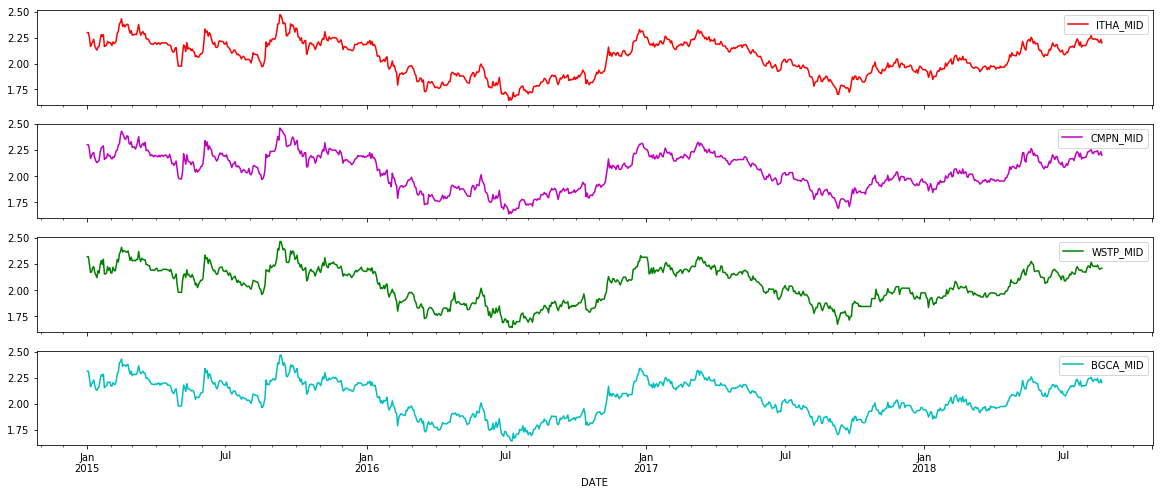

In [4]:
## Display visualizations of df_rates ##
plt.figure(figsize=(20,8))

ax1 = plt.subplot(4,1,1)
df_rates['ITHA_MID'].plot(label = 'ITHA_MID', color = 'r')
plt.legend()

ax2 = plt.subplot(4,1,2, sharex=ax1)
df_rates['CMPN_MID'].plot(label = 'CMPN_MID', color = 'm')
plt.legend()

ax3 = plt.subplot(4,1,3, sharex=ax1)
df_rates['WSTP_MID'].plot(label = 'WSTP_MID', color = 'g')
plt.legend()

ax4 = plt.subplot(4,1,4, sharex=ax1)
df_rates['BGCA_MID'].plot(label = 'BGCA_MID', color = 'c')
plt.legend()

plt.show()

In [103]:
## Initialize variables ##
adf_results = {}
df_adf = pd.DataFrame(columns = df_rates.columns)

## Test stationarity of each timeseries using Augmented Dickey-Fuller test ##
# If Test Statistics < Critical Value, then we reject the null hypothesis of non-stationarity, i.e. series is stationary
for column in df_rates.columns:
    adf_results[column] = adfuller(df_rates[column], autolag = 'AIC')
    lst = list(adf_results[column][0:3])
    lst.append(adf_results[column][4]['5%']) 
    lst.append('N' if lst[0] > lst[-1] else 'Y')
    df_adf[column] = pd.Series(lst, 
                               index = ['Test Statistics', 'p-value', 'Lags used', 'Critical Value (5%)', 'Stationary'])

print(df_adf)

                      ITHA_MID   CMPN_MID   WSTP_MID   BGCA_MID
Test Statistics       -2.78937   -2.91297   -2.95306   -2.89307
p-value              0.0598088  0.0438608  0.0395163  0.0461596
Lags used                    0          0          0          0
Critical Value (5%)   -2.86459   -2.86459   -2.86459   -2.86459
Stationary                   N          Y          Y          Y
